In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [2]:
student_mat = pd.read_csv('~/Downloads/student/student-mat.csv', delimiter = ';')

In [3]:
print(student_mat)

    school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
5       GP   M   16       U     LE3       T     4     3  services     other   
6       GP   M   16       U     LE3       T     2     2     other     other   
7       GP   F   17       U     GT3       A     4     4     other   teacher   
8       GP   M   15       U     LE3       A     3     2  services     other   
9       GP   M   15       U     GT3       T     3     4     other     other   
10      GP   F   15       U     GT3       T     4     4   teacher    health   
11      GP   F   15       U     GT3       T     2   

In [4]:
print("Shape of student_mat: {}".format(student_mat.shape))

Shape of student_mat: (395, 33)


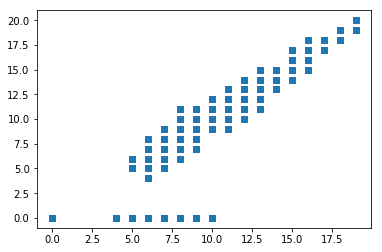

In [5]:
# 片方0のデータを、ラベリングしておく
plt.plot(student_mat['G2'], student_mat['G3'], 's')

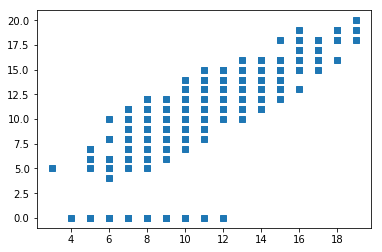

In [6]:
# 片方0のデータを、ラベリングしておく
plt.plot(student_mat['G1'], student_mat['G3'], 's')

In [7]:
X = student_mat.drop(['G3', 'school', 'guardian'], axis=1)
y = student_mat['G3']
print(X)
print(y)

    sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0     F   18       U     GT3       A     4     4   at_home   teacher   
1     F   17       U     GT3       T     1     1   at_home     other   
2     F   15       U     LE3       T     1     1   at_home     other   
3     F   15       U     GT3       T     4     2    health  services   
4     F   16       U     GT3       T     3     3     other     other   
5     M   16       U     LE3       T     4     3  services     other   
6     M   16       U     LE3       T     2     2     other     other   
7     F   17       U     GT3       A     4     4     other   teacher   
8     M   15       U     LE3       A     3     2  services     other   
9     M   15       U     GT3       T     3     4     other     other   
10    F   15       U     GT3       T     4     4   teacher    health   
11    F   15       U     GT3       T     2     1  services     other   
12    M   15       U     LE3       T     4     4    health  serv

In [8]:
X['sex'] = X['sex'].replace('yes', 1).replace('no', 0)
X['sex'] = X['sex'].replace('M', 1).replace('F', 0)
X['address'] =  X['address'].apply(lambda x : 1 if x == 'U' else 0)
X['famsize'] =  X['famsize'].apply(lambda x : 1 if x == 'GT3' else 0)
X['Pstatus'] =  X['Pstatus'].apply(lambda x : 1 if x == 'T' else 0)

In [9]:
def feature_profession(prof):
    if prof == 'teacher':
        return 5
    elif prof == 'health':
        return 4
    elif prof == 'services':
        return 3
    elif prof == 'at home':
        return 2
    else:
        return 1
    
    
def feature_reason(res):
    if res == 'home':
        return 1
    if res == 'reputation':
        return 4
    if res == 'course':
        return 3
    else:
        return 2
    

In [10]:
X['Mjob'] = X['Mjob'].apply(feature_profession)
X['Fjob'] = X['Fjob'].apply(feature_profession)
X['reason'] = X['reason'].apply(feature_reason)


X['schoolsup'] = X['schoolsup'].replace('yes', 1).replace('no', 0)
X['famsup'] = X['famsup'].replace('yes', 1).replace('no', 0)
X['paid'] = X['paid'].replace('yes', 1).replace('no', 0)
X['activities'] = X['activities'].replace('yes', 1).replace('no', 0)
X['nursery'] = X['nursery'].replace('yes', 1).replace('no', 0)
X['higher'] = X['higher'].replace('yes', 1).replace('no', 0)
X['internet'] = X['internet'].replace('yes', 1).replace('no', 0)
X['romantic'] =  X['romantic'].replace('yes', 1).replace('no', 0)

In [11]:
print(student_mat.columns)

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [13]:
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.424


In [14]:
for x, t in zip(X, tree.feature_importances_):
    print("{}:{:.2f}% \n".format(x, t*100))

sex:0.99% 

age:2.95% 

address:0.55% 

famsize:2.33% 

Pstatus:0.37% 

Medu:3.29% 

Fedu:1.29% 

Mjob:3.97% 

Fjob:1.81% 

reason:4.68% 

traveltime:0.49% 

studytime:2.68% 

failures:2.32% 

schoolsup:0.00% 

famsup:0.49% 

paid:1.08% 

activities:0.68% 

nursery:1.31% 

higher:0.00% 

internet:1.37% 

romantic:0.48% 

famrel:1.51% 

freetime:4.72% 

goout:5.31% 

Dalc:1.15% 

Walc:3.92% 

health:1.62% 

absences:9.44% 

G1:9.99% 

G2:29.21% 



Text(0, 0.5, 'Feature')

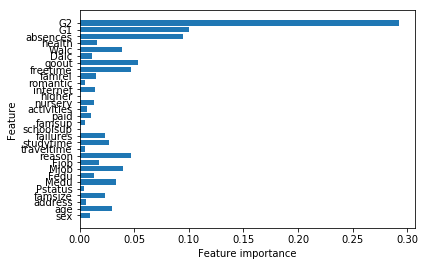

In [15]:
n_features = X.shape[1]
plt.barh(range(n_features), tree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")

* 1%台：`sex`、`Fedu`、`Fjob`、`paid`、`nursery`、`internet`、`famrel`、`Dalc`、`health`

* 2%台：`age`、`famsize`、`studytime`、`failures`

* 3~4%：`Medu`、`Mjob`、`reason`、`freetime`

* 5~10%：``goout`、`absences`、`G1`

In [16]:
# 勾配ブースティング回帰木
from sklearn.ensemble import GradientBoostingClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y,  random_state=0)

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.515


In [17]:
# ランダムフォレスト
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.424


In [18]:
# ニューラルネットワーク
from sklearn.neural_network import MLPClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
clf = MLPClassifier(solver="sgd",random_state=0,max_iter=10000)
clf.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.424


In [19]:
# 最小二乗法
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(lr.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(lr.score(X_test, y_test)))

Accuracy on training set: 0.863
Accuracy on test set: 0.790


/Users/MacUser/anaconda2/envs/tf140/lib/python3.6/site-packages/sklearn/linear_model/base.py:485: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


In [20]:
# リッジ回帰
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train, y_train) 
print("Accuracy on training set: {:.3f}".format(ridge.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(ridge.score(X_test, y_test)))

Accuracy on training set: 0.863
Accuracy on test set: 0.790


In [21]:
# ラッソ回帰
from sklearn.linear_model import Lasso
lasso = Lasso().fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(lasso.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(lasso.score(X_test, y_test)))

Accuracy on training set: 0.839
Accuracy on test set: 0.767


In [22]:
from sklearn.tree import export_graphviz
export_graphviz(tree,
                                feature_names= X_train.columns,
                                out_file="tree.dot",
                                filled=True,
                                rounded=True,
                                )

# export_graphviz(tree, out_file="tree.dot", 
#                               class_names=["malignant", "benign"], 
#                               feature_names=cancer.feature_names,
#                               impurity=False,
#                               filled=True)

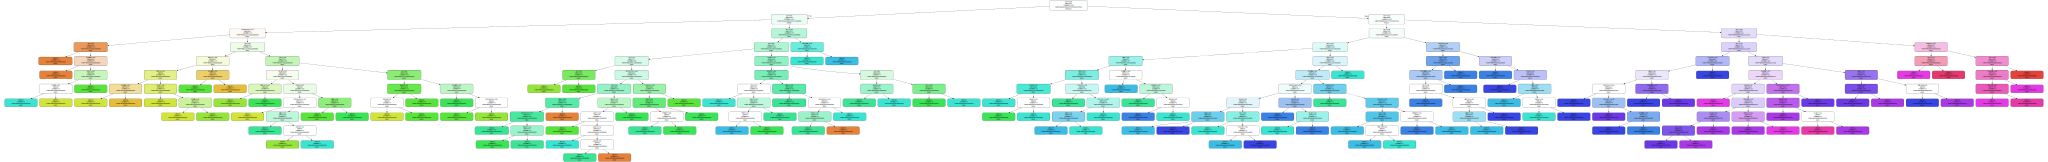

In [23]:
import graphviz

with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)